## Contents: Week 03 lab

* [Loops](#Loops)
* [Working with data files](#Working-with-data-files)
* [WCOA 2013 cruise data analysis](#WCOA-2013-cruise-data-analysis)

## Loops

Loops are a way of repeating commands over and over again.

A _while_ loop is an indefinite loop. It runs indefinitely until a certain condition is met. Be careful with while loops. If the condition is never met, the while loop will try to run forever.

In [39]:
i = 0
while i<5:
    i = i + 1
    print(i)
print('done with while loop')

1
2
3
4
5
done with while loop


A _for_ loop is a definite loop. It iterates over a list, array or other variable types that are groups of values or other variables. It definitely stops when it gets to the end of the list.

In [40]:
name_list = ['Bob','Jane','Mary']
for name in name_list:
    print("Hello " + name)
print('done')         

Hello Bob
Hello Jane
Hello Mary
done


An example of looping through a sequence of numbers created with the `np.arange()` function.

In [41]:
import numpy as np
print(np.arange(5))

[0 1 2 3 4]


In [42]:
print(np.arange(2,5))

[2 3 4]


In [43]:
print(np.arange(2,5,0.5))

[ 2.   2.5  3.   3.5  4.   4.5]


In [44]:
for i in np.arange(5):
    print(i*2)

0
2
4
6
8


__Exercise__:

Write a for loop that prints out the cumulative sum of an array. For example, the cumulative sum of the array

```
[1,3,6,4,7]
```

would be:

```
[1,4,10,14,21]
```

## Working with data files

In this tutorial, we will use data files as input. We will start with the most basic ways of importing data using core Python functions, then use Numpy and the data analysis package Pandas.

First we will use a small data set and use it to understand how to work with 2-D arrays.

Then, we will work with a larger data set from the 2013 West Coast Ocean Acidification cruise on the R/V Pt. Sur.

In [12]:
import numpy as np
from scipy import stats

### Example: geological data

The lowest level method of using files as data input in Python is to work with file handles. The `open()` function loads the file into memory (that is, the computer's short-term memory where data can be accessed quickly). The file handle represents the location of the file in memory.

The first file that we will work with is data from Table 10.1 of McKillup and Dyar, Geostatistics Explained, Cambridge University Press, 2010.

Values are the weight percent of MgO present in tourmalines from three locations in Maine.
Each CSV file contains the same data in a different format.

In [13]:
filename = 'data/week02_MgO_data_example/MgO_Maine.csv'
fhand = open(filename)
fhand.read()

'Mount Mica,Sebago Batholith,Black Mountain\n7,         4,               1\n8,         5,               2\n10,        7,               4\n11,        8,               5\n'

Here `\n` represents a newline character. Newline characters are always present in text files, but text files make them invisible and display a new line.

Once the file handle has been read to the end of the file, it cannot be read any more.

In [14]:
fhand.read()

''

In order to read the file again, it has to be opened again. The contents of the file can also be read line by line. This can be useful if there is some processing step that has to be done to each line individually.

In [15]:
fhand = open(filename)
for line in fhand:
    print(line)
    print('next line')

Mount Mica,Sebago Batholith,Black Mountain

next line
7,         4,               1

next line
8,         5,               2

next line
10,        7,               4

next line
11,        8,               5

next line


For numeric data, the NumpPy package provides an easy way to load data from a text file directly into an array. You can specify the number of header lines, the delimiter that separates data values, and many other options for specifiying the format.

In [16]:
data = np.genfromtxt(filename,skip_header=1,delimiter=',')
print(data)

[[  7.   4.   1.]
 [  8.   5.   2.]
 [ 10.   7.   4.]
 [ 11.   8.   5.]]


In [17]:
type(data)

numpy.ndarray

This data set has two dimensions (rows and columns). Some data sets can have more than two dimensions. An oceanographic data set might have separate dimensions for time, depth, latitude and longitude. This data set could be visualized as a series of cubes.

In [18]:
np.ndim(data) # number of dimensions

2

For this two-dimensional data set, the "shape" is specified by the number of rows and columns.

In [19]:
np.shape(data) # (rows, columns)

(4, 3)

To obtain just the number of rows or columns, use indexing.

In [20]:
np.shape(data)[1] # just the columns

3

Rows and columns can be accessed by "slicing" the data set. The location of each value in the array can be represented by two indices. The first represents the row index, and the second represents the column index.

In [21]:
data[1,2]

2.0

A colon `:` can be used to access all values in a row or column. To access all rows in the 0 column:

In [22]:
data[:,0]

array([  7.,   8.,  10.,  11.])

In [23]:
data

array([[  7.,   4.,   1.],
       [  8.,   5.,   2.],
       [ 10.,   7.,   4.],
       [ 11.,   8.,   5.]])

Indices can also referenced to the end of the rows and columns with negative numbers.

In [24]:
data[-3,-2]

5.0

Numpy functions can also often be applied just along rows or columns. Take the `np.mean` function. The grand mean of all values is given by:

In [25]:
np.mean(data) # grand mean

6.0

Taking the mean along `axis=0` gives the column mean. This is the mean of all the rows (dimension 0) in each column. The result is one value for each column.

In [26]:
np.mean(data,axis=0)

array([ 9.,  6.,  3.])

To obtain the mean of each row, use the `axis = 1` option.

In [27]:
np.mean(data,axis=1)

array([ 4.,  5.,  7.,  8.])

#### Exercise:  ANOVA (the hard way)

Calculate the sum of squares within groups and the sum of squares between groups. Use these values to caluculate F in an analysis of variance.

__Hint:__ the `np.tile` function may be useful.

In [28]:
arr = [1,2,3]
np.tile([1,2,3],(3,1))

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

The stats library can be used to fund critical values of the F distribution (compare with tables).

In [29]:
stats.f.ppf(0.95,4,3)

9.1171822532464173

## WCOA 2013 cruise data analysis

In this part of the tutorial, we will go over the basics of working with dates in Pandas and Numpy, make some exploratory plots and start a regression analysis. The data exploration will be largely guided by student interest.

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

We use Pandas to import the csv data file. 

Here, there is an optional `parse_dates` argument. The numbers in double brackets `[[8,9]]` indicate which columns to interpret as dates.

In [4]:
filename = 'data/week03_wcoa_cruise/WCOA2013_hy1.csv'
df = pd.read_csv(filename,header=31,na_values=-999,
                 parse_dates=[[8,9]])

In [5]:
df.head()

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.2,...,2370.2,2,2369.0,2,7.294,2,25.0,NaN,9,NaN
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.2,...,NaN,9,NaN,9,7.295,2,25.0,NaN,9,NaN
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.2,...,2349.6,2,2343.7,2,7.282,2,25.0,43.521,3,NaN
3,2013-08-05 02:27:01,317W20130803,WCOA2013,1,2,11,1,4,2,48.2,...,2318.7,2,2311.9,2,7.287,2,25.0,45.641,2,NaN
4,2013-08-05 02:30:53,317W20130803,WCOA2013,1,2,11,1,5,2,48.2,...,2300.0,2,2299.7,2,7.308,2,25.0,47.741,2,NaN


Instead of strings, the dates are now in a special `datetime64` format. This means that, instead of treating the dates in the same way as any other collection of characters, pandas and NumPy can understand how this variable represents time.

In [6]:
df['DATE_TIME'].head()

0   2013-08-05 02:12:20
1   2013-08-05 02:12:53
2   2013-08-05 02:19:58
3   2013-08-05 02:27:01
4   2013-08-05 02:30:53
Name: DATE_TIME, dtype: datetime64[ns]

For example, subtracting `datetime64` objects with pandas gives a `Timedelta` object, which is specifically used to represent differences between times. The first two samples in the cruise data are separated by 33 seconds (the time between firing of bottles).

In [7]:
df['DATE_TIME'][1]-df['DATE_TIME'][0]

Timedelta('0 days 00:00:33')

In addition, pyplot automatically understands `datetime64` objects so it is easy to see how the ship moved between stations from north to south as weeks passed.

<IPython.core.display.Javascript object>


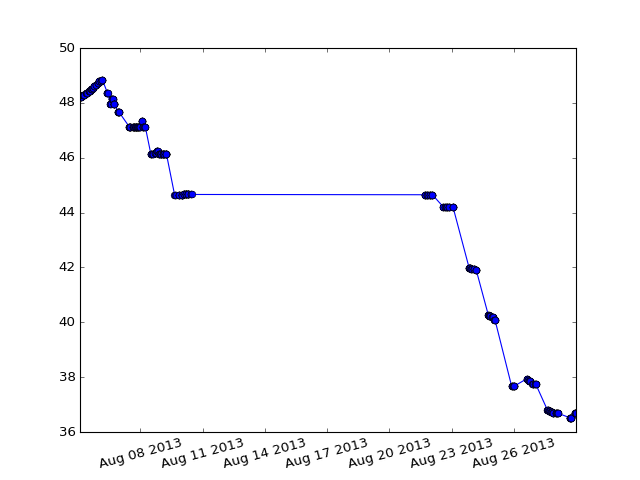

(array([ 735088.,  735091.,  735094.,  735097.,  735100.,  735103.,  735106.]),
 <a list of 7 Text xticklabel objects>)

In [8]:
plt.plot(df['DATE_TIME'],df['LATITUDE'],'-o')
plt.xticks(rotation=15)

<IPython.core.display.Javascript object>


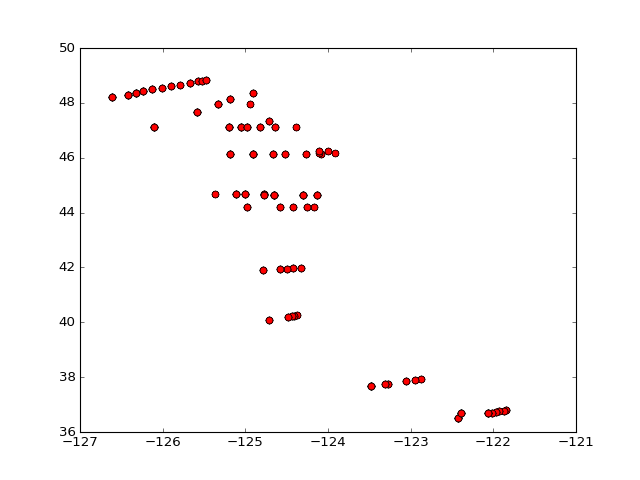

In [10]:
plt.figure()
plt.plot(df['LONGITUDE'], df['LATITUDE'], 'ro')

The `scatter()` function allows points to be colored according to the value of a variable. In the case of dates, later dates are shown as warmer colors.

<IPython.core.display.Javascript object>


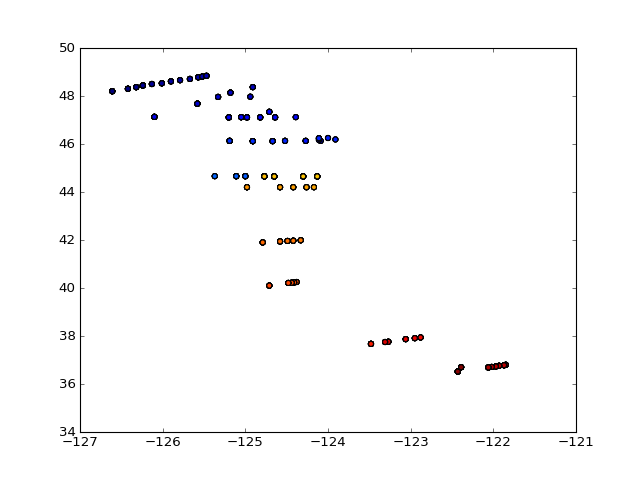

In [11]:
plt.figure()
plt.scatter(df['LONGITUDE'],df['LATITUDE'],c=df['DATE_TIME'])

Note that the vertical coordinate is pressure (not depth, which indicates the bottom depth rather than the depth of the sample). To plot dissolved oxygen with depth:

<IPython.core.display.Javascript object>


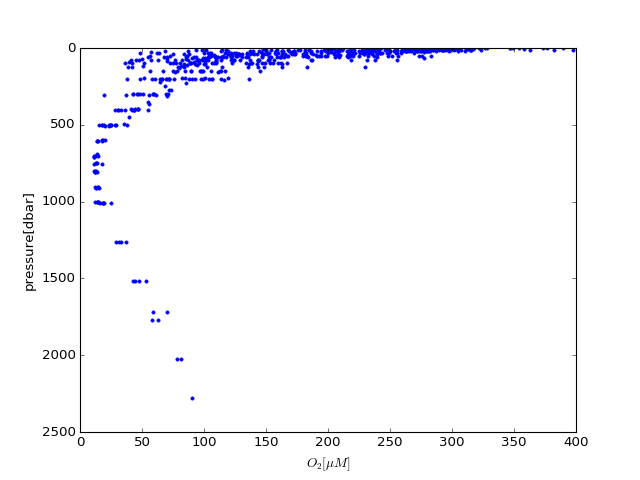

In [12]:
plt.figure()
plt.plot(df['OXYGEN'],df['CTDPRS'],'.')
plt.gca().invert_yaxis()

plt.xlabel('$O_2 [\mu M]$')
plt.ylabel('pressure[dbar]')

Finally, suppose we want to compute the regression of nitrate on phosphate using all of the available data. In theory the slope is given by the "Redfield ratio". 

We can use `stats.linregress`, but this gives us back `NaN` values. This is because there are `NaN` values in the inputs.

In [20]:
x = df['PHSPHT']
y = df['NITRAT']

results = stats.linregress(x,y)
results

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

We can use the `np.finite()` function and create an array of boolean (`True` and `False`) values to select only finite numbers (which does not include `NaN`s).

In [21]:
ii=(np.isfinite(x) & np.isfinite(y))
results=stats.linregress(x[ii],y[ii])
results

LinregressResult(slope=15.447256509328257, intercept=-6.1269014162479678, rvalue=0.98732121974431153, pvalue=0.0, stderr=0.082372778989148202)

<IPython.core.display.Javascript object>


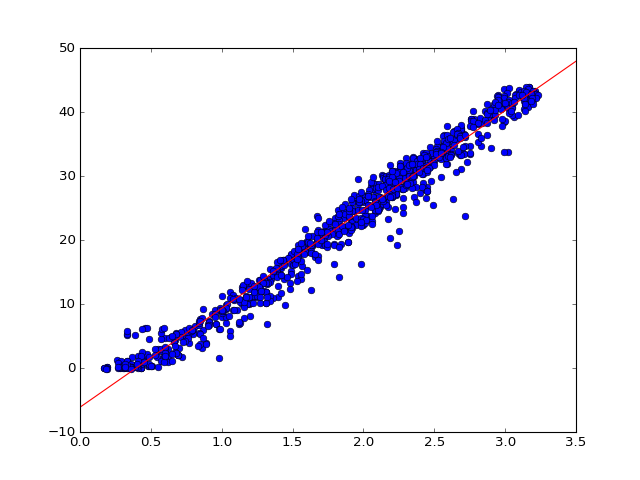

In [23]:
plt.figure()
plt.plot(df['PHSPHT'][ii],df['NITRAT'][ii],'o')
plt.plot(np.array([0,3.5]),results.slope*np.array([0,3.5])+results.intercept,'r-')

#### Execrises

* What scientfic questions can be addressed with this data set?
* What relationships might occur between different variables?
* What differences might occur within the same variables, but at different locations or times?
* Create exploratory plots
* Do a correlation and regression analysis. Obtain r and p values. Draw both the regression of _y_ on _x_, and the regression of _x_ on _y_.

In [ ]:
df.keys()